## 1. Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## 2. VGG16 (base model)

In [3]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

## 3. VGG16 (first 10 conv layers)

In [4]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_conv3').output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [5]:
for layer in base_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f16b67fefd0> False
<keras.layers.convolutional.Conv2D object at 0x7f16b681f5c0> True
<keras.layers.convolutional.Conv2D object at 0x7f16b681f438> True
<keras.layers.pooling.MaxPooling2D object at 0x7f16b67c9630> True
<keras.layers.convolutional.Conv2D object at 0x7f16b67c94a8> True
<keras.layers.convolutional.Conv2D object at 0x7f16b678c320> True
<keras.layers.pooling.MaxPooling2D object at 0x7f16b67ab438> True
<keras.layers.convolutional.Conv2D object at 0x7f16b67ab2b0> True
<keras.layers.convolutional.Conv2D object at 0x7f16b674c6a0> True
<keras.layers.convolutional.Conv2D object at 0x7f16b676c240> True
<keras.layers.pooling.MaxPooling2D object at 0x7f16b67284a8> True
<keras.layers.convolutional.Conv2D object at 0x7f16b6728320> True
<keras.layers.convolutional.Conv2D object at 0x7f16b66c9cc0> True
<keras.layers.convolutional.Conv2D object at 0x7f16b66e6320> True
<keras.layers.pooling.MaxPooling2D object at 0x7f16b66a6588> True
<keras.

## Load an image and predict

In [6]:
img_path = '../datasets/toy_set/train/images/001cell.png'
img = skimage.io.imread(img_path)
img.shape, img.dtype, (img.min(), img.max()), img.min(axis=(0,1))

((256, 256, 3), dtype('uint8'), (0, 252), array([0, 0, 4], dtype=uint8))

## Be careful with preprocess_input(img) for VGG16
The inputs should be from 0 to 255;
1. The input image is converted from RGB to BGR;
2. The mean BGR value [103.939, 116.779, 123.68] is subtracted.
3. The preprocessed data is written over the input data if the data types are compatible.

https://stackoverflow.com/questions/53092971/keras-vgg16-preprocess-input-modes

In [7]:
img_preproc = preprocess_input(img.copy())
img_preproc.shape, img_preproc.dtype, (img_preproc.min(), img_preproc.max()), img_preproc.min(axis=(0,1))

((256, 256, 3),
 dtype('float32'),
 (-123.68, 148.061),
 array([ -99.939, -116.779, -123.68 ], dtype=float32))

In [8]:
pred_preproc = model.predict(img_preproc[np.newaxis])[0]

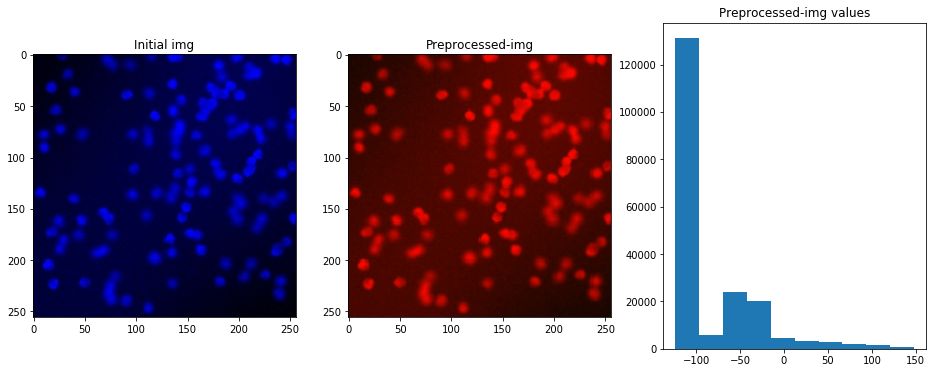

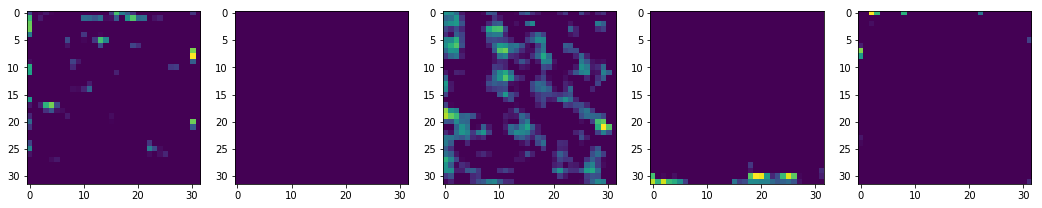

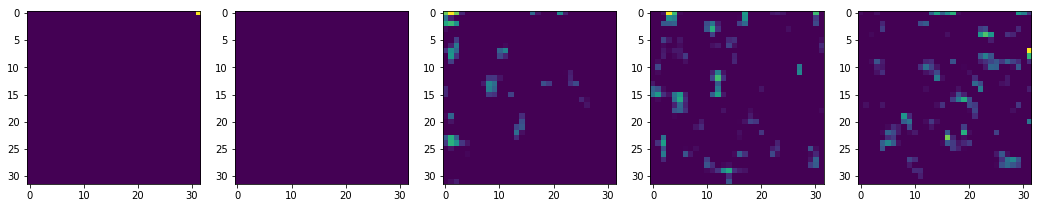

In [9]:
def norm(img):
    min_val = img.min()
    max_val = img.max()
    return (img - min_val) / (max_val - min_val)

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.title('Initial img')
plt.imshow(img.astype(int))
plt.subplot(1, 3, 2)
plt.title('Preprocessed-img')
plt.imshow(norm(img_preproc))
plt.subplot(1, 3, 3)
plt.title('Preprocessed-img values')
plt.hist(img_preproc.flatten())

for rows in range(2):
    plt.figure(figsize=(18, 6))
    for idx in range(5):
        plt.subplot(1, 5, idx + 1)
        plt.imshow(pred_preproc[..., idx + 11 * (rows + 1)])